In [1]:
import seaborn
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

In [2]:
blood_gdf = gpd.read_file('blood_lead.geojson')
blood_gdf.head(15)

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"MULTIPOLYGON (((-75.14147 39.95171, -75.14150 ..."
1,42101000200,1,NaN,109.0,NaN,"MULTIPOLYGON (((-75.16238 39.95765, -75.16236 ..."
2,42101000300,1,NaN,110.0,NaN,"MULTIPOLYGON (((-75.17820 39.95981, -75.17743 ..."
3,42101000401,1,NaN,61.0,NaN,"MULTIPOLYGON (((-75.17299 39.95464, -75.17301 ..."
4,42101000402,0,0.0,41.0,0.0,"MULTIPOLYGON (((-75.16333 39.95334, -75.16340 ..."
5,42101000500,1,NaN,49.0,NaN,"MULTIPOLYGON (((-75.16340 39.95335, -75.16333 ..."
6,42101000600,0,0.0,24.0,0.0,"MULTIPOLYGON (((-75.16394 39.95087, -75.16386 ..."
7,42101000700,0,0.0,57.0,0.0,"MULTIPOLYGON (((-75.17349 39.95206, -75.17271 ..."
8,42101000801,1,NaN,57.0,NaN,"MULTIPOLYGON (((-75.17742 39.95050, -75.17747 ..."
9,42101000803,0,0.0,63.0,0.0,"MULTIPOLYGON (((-75.17742 39.95050, -75.17733 ..."


In [3]:
blood_gdf['perc_5plus'].describe
blood_gdf.describe

<bound method NDFrame.describe of       census_tra  data_redac  num_bll_5p  num_screen  perc_5plus  \
0    42101000100           0         0.0       100.0         0.0   
1    42101000200           1         NaN       109.0         NaN   
2    42101000300           1         NaN       110.0         NaN   
3    42101000401           1         NaN        61.0         NaN   
4    42101000402           0         0.0        41.0         0.0   
..           ...         ...         ...         ...         ...   
375  42101980200           1         NaN         NaN         NaN   
376  42101980700           1         NaN         NaN         NaN   
377  42101980800           1         NaN         NaN         NaN   
378  42101980900           1         NaN         NaN         NaN   
379  42101989100           1         NaN         NaN         NaN   

                                              geometry  
0    MULTIPOLYGON (((-75.14147 39.95171, -75.14150 ...  
1    MULTIPOLYGON (((-75.16238 39.9

In [4]:
maxvalue = blood_gdf['perc_5plus'].max()
minvalue = blood_gdf['perc_5plus'].min()
stand = blood_gdf['perc_5plus'].std()

print('The max, min, and standard deviation values are:', maxvalue, minvalue, stand)


The max, min, and standard deviation values are: 17.6 0.0 3.939310319084675


In [5]:
import pandas as pd

pd.isnull(blood_gdf['perc_5plus']).sum()

126

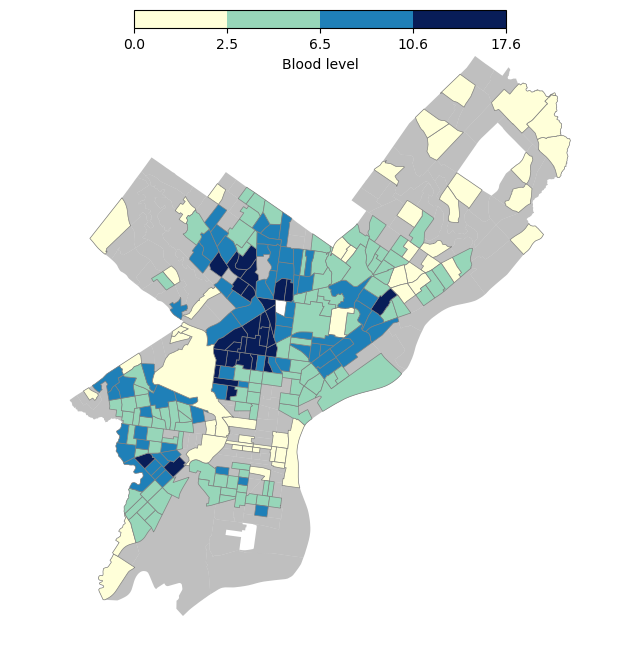

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


blood_lead_gdf = gpd.read_file('blood_lead.geojson')
blood_lead_gdf_phily = blood_lead_gdf.to_crs(epsg=2272) #


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
blood_lead_gdf_phily.plot(ax=ax, alpha=0.5, color='grey')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='FisherJenks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.FisherJenks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height

# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()

In [10]:
blood_lead_gdf = gpd.read_file('blood_lead.geojson')
blood_lead_gdf.head()

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"MULTIPOLYGON (((-75.14147 39.95171, -75.14150 ..."
1,42101000200,1,NaN,109.0,NaN,"MULTIPOLYGON (((-75.16238 39.95765, -75.16236 ..."
2,42101000300,1,NaN,110.0,NaN,"MULTIPOLYGON (((-75.17820 39.95981, -75.17743 ..."
3,42101000401,1,NaN,61.0,NaN,"MULTIPOLYGON (((-75.17299 39.95464, -75.17301 ..."
4,42101000402,0,0.0,41.0,0.0,"MULTIPOLYGON (((-75.16333 39.95334, -75.16340 ..."


In [11]:
blood_lead_gdf_valid = blood_lead_gdf.dropna(how='any',axis=0) 
 

C:\Users\tui87698\AppData\Local\Temp\ipykernel_18584\1219848108.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perc_5plus)


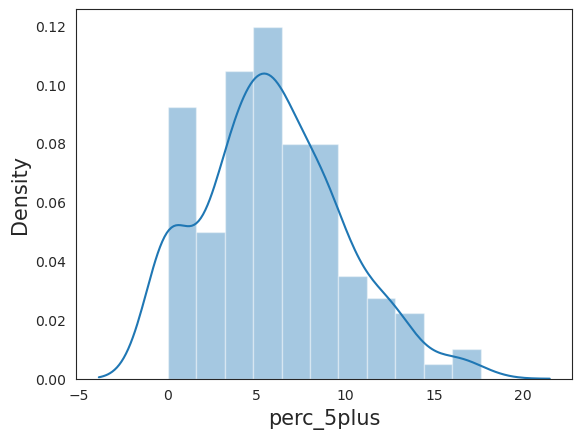

In [12]:
import seaborn as sns

# set the label size of the histogram
plt.rcParams["axes.labelsize"] = 15

# get the column of perc_5plus
perc_5plus = blood_lead_gdf_valid['perc_5plus']

# plot the histogram distribution 
with sns.axes_style("white"):
    sns.distplot(perc_5plus)

C:\Users\tui87698\AppData\Local\Temp\ipykernel_18584\658569475.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_bll_5p)


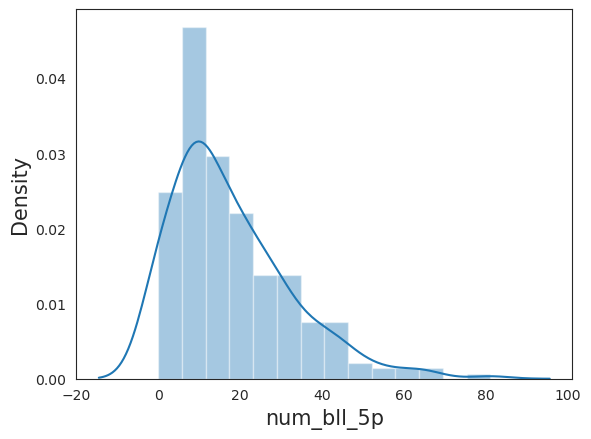

In [13]:
num_bll_5p = blood_lead_gdf_valid['num_bll_5p']

with sns.axes_style("white"):
    sns.distplot(num_bll_5p)

In [14]:
# slice two column from `blood_lead_gdf_valid` and create a new dataframe
plot_df = blood_lead_gdf_valid[['num_bll_5p', 'perc_5plus']]
 

Text(0.5, 1.0, 'Box maps')

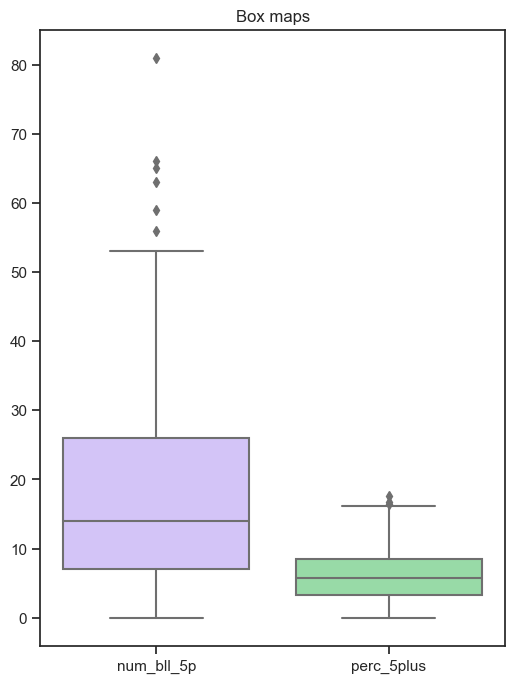

In [15]:
# set the size of the plot
plt.figure(figsize=(6, 8))

sns.set_style("white")
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=plot_df, palette=["m", "g"])
plt.title("Box maps")

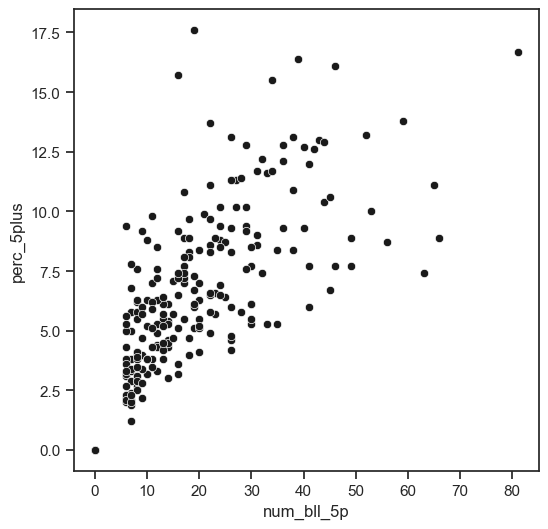

In [16]:
plt.figure(figsize=(6, 6))

ax = sns.scatterplot(x="num_bll_5p", y="perc_5plus", data=plot_df, color='k')


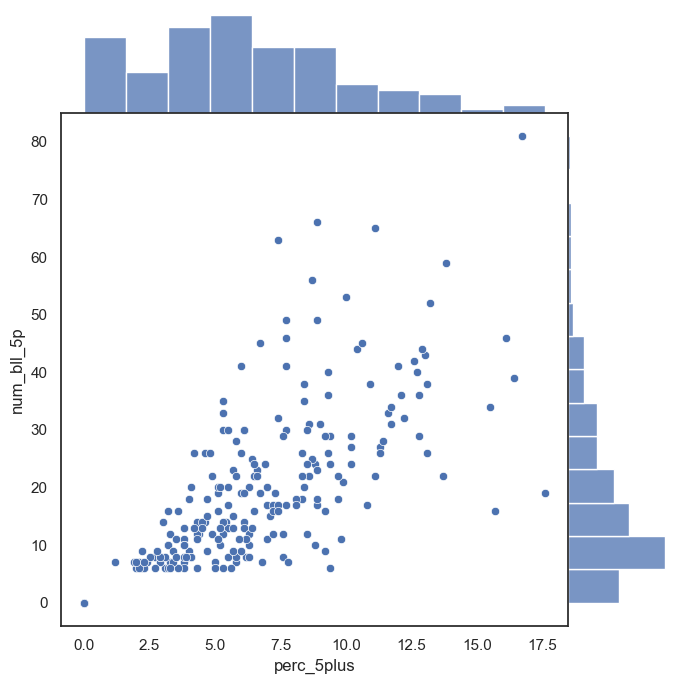

In [17]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x=perc_5plus, y=num_bll_5p, data=plot_df, height=7, space=0) #kind="hex",


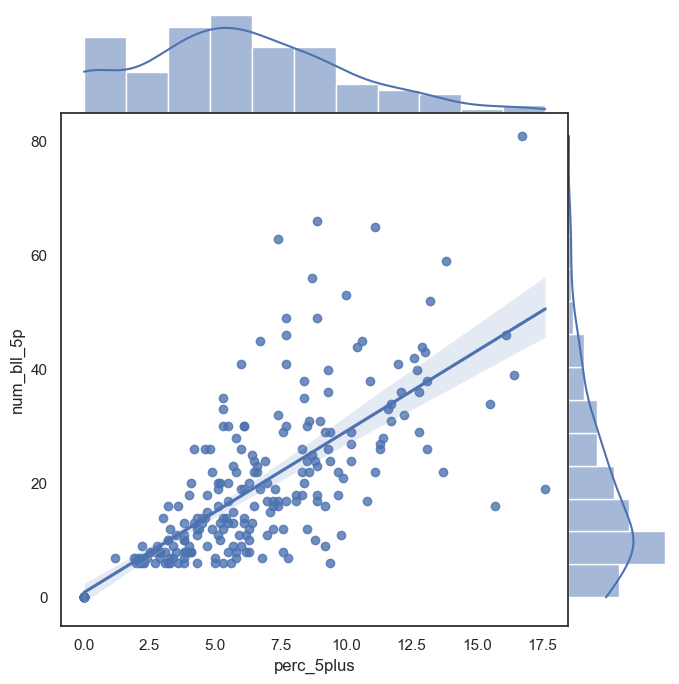

In [18]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x=perc_5plus, y=num_bll_5p, data=plot_df, kind="reg", height=7, space=0)
    
    


In [19]:
# pearson correlation
plot_df.corr(method = 'pearson')

,num_bll_5p,perc_5plus
num_bll_5p,1.000000,0.757234
perc_5plus,0.757234,1.000000


In [20]:
# spearman correlation or rank correlation
plot_df.corr(method = 'spearman')

,num_bll_5p,perc_5plus
num_bll_5p,1.000000,0.822991
perc_5plus,0.822991,1.000000


In [21]:
!pip install libpysal

In [22]:
import libpysal as lps

# fill the nan with mean value of the column
blood_lead_gdf['perc_5plus'].fillna((blood_lead_gdf['perc_5plus'].mean()), inplace=True)

# create the queen spatial weight
df = blood_lead_gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [23]:
wq.transform = 'r'
y = df['perc_5plus']

In [24]:
!pip install esda

  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122773 sha256=70ec23ac6894e2a20c7b7b4ca5d4d0bab16014ef899eb3144f835c032228091d
  Stored in directory: c:\users\tui87698\appdata\local\pip\cache\wheels\92\4b\14\df69615cd54ad1ce64b70d141dee8b269ebc7ace679cef9f3f
Successfully built esda


In [25]:
import esda
import numpy as np

np.random.seed(12345)

# calculate the moran's I coefficient
mi = esda.moran.Moran(y, wq)
mi.I

0.46716047948745465

C:\Users\tui87698\AppData\Local\Temp\ipykernel_18584\2386594959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(mi.sim, shade=True)


Text(0.5, 0, "Moran's I")

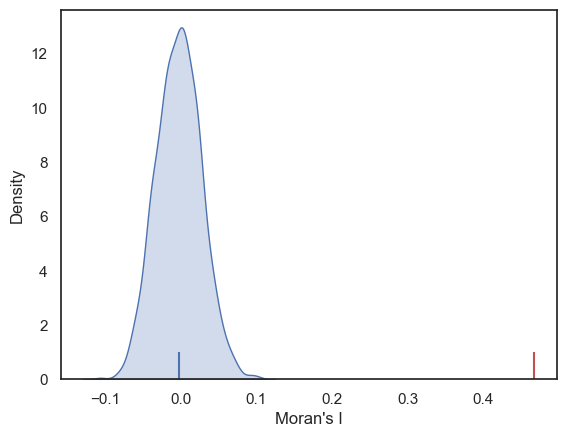

In [26]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [27]:
mi.p_sim

0.001

In [44]:
heat_gdf = gpd.read_file('heat.geojson')
heat_gdf.head(15)

,OBJECTID_1,GEOID10,NAME10,OBJECTID,HSI_SCORE,HEI_SCORE,HVI_SCORE,N_VERYHIGH,Shape__Area,Shape__Length,geometry
0,1,42101019000,190,19.0,0.628858,0.130289,0.935255,0.0,1.350244e+06,5483.874734,"POLYGON ((-75.09490 40.01049, -75.09497 40.010..."
1,2,42101019100,191,20.0,0.538256,2.208449,2.963969,1.0,2.491485e+06,7728.470750,"POLYGON ((-75.10715 40.01674, -75.10706 40.016..."
2,3,42101019200,192,21.0,0.644698,1.705167,2.676547,1.0,1.120759e+06,5638.148182,"POLYGON ((-75.10760 39.99967, -75.10815 39.999..."
3,4,42101019700,197,22.0,-0.807921,2.763526,3.156173,1.0,7.688302e+05,3791.744189,"POLYGON ((-75.13586 40.01199, -75.13654 40.012..."
4,5,42101019800,198,23.0,-0.542459,2.549294,2.885302,1.0,9.234407e+05,4189.517838,"POLYGON ((-75.13672 40.00803, -75.13686 40.007..."
5,6,42101019900,199,24.0,-0.932793,2.807744,2.973470,1.0,1.129508e+06,4314.962567,"POLYGON ((-75.13886 40.00322, -75.13899 40.003..."
6,7,42101020000,200,25.0,-0.500884,-0.354854,-0.289216,0.0,5.403059e+05,4048.132611,"POLYGON ((-75.14780 40.00016, -75.14772 39.999..."
7,8,42101020200,202,26.0,-0.940339,0.701139,0.563881,0.0,1.291572e+06,5104.433910,"POLYGON ((-75.16429 40.00308, -75.16590 40.003..."
8,9,42101020300,203,27.0,-1.260030,1.363072,1.443291,0.0,8.672223e+05,5262.760049,"POLYGON ((-75.14955 40.01788, -75.14935 40.017..."
9,10,42101020400,204,28.0,-1.224279,1.296948,1.415492,0.0,6.954559e+05,3715.326123,"POLYGON ((-75.14955 40.01788, -75.15031 40.017..."


In [45]:
heat_gdf['HVI_SCORE'].describe
heat_gdf.describe

<bound method NDFrame.describe of      OBJECTID_1      GEOID10 NAME10  OBJECTID  HSI_SCORE  HEI_SCORE  \
0             1  42101019000    190      19.0   0.628858   0.130289   
1             2  42101019100    191      20.0   0.538256   2.208449   
2             3  42101019200    192      21.0   0.644698   1.705167   
3             4  42101019700    197      22.0  -0.807921   2.763526   
4             5  42101019800    198      23.0  -0.542459   2.549294   
..          ...          ...    ...       ...        ...        ...   
379         380  42101980700   9807       NaN        NaN        NaN   
380         381  42101980800   9808       NaN        NaN        NaN   
381         382  42101980500   9805       NaN        NaN        NaN   
382         383  42101980600   9806       NaN        NaN        NaN   
383         384  42101980300   9803       NaN        NaN        NaN   

     HVI_SCORE  N_VERYHIGH   Shape__Area  Shape__Length  \
0     0.935255         0.0  1.350244e+06    5483.87473

In [46]:
maxvalue = heat_gdf['HVI_SCORE'].max()
minvalue = heat_gdf['HVI_SCORE'].min()
stand = heat_gdf['HVI_SCORE'].std()

print('The max, min, and standard deviation values are:', maxvalue, minvalue, stand)

The max, min, and standard deviation values are: 5.06250688 -6.18890511 1.9958211409248916


In [47]:
import pandas as pd

pd.isnull(heat_gdf['HVI_SCORE']).sum()

10

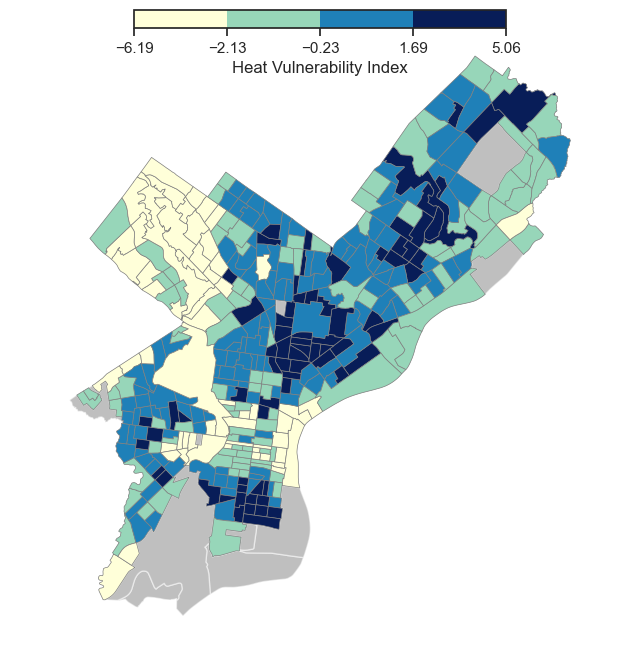

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


heat_gdf = gpd.read_file('heat.geojson')
heat_gdf_phily = heat_gdf.to_crs(epsg=2272) #


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
heat_gdf_phily.plot(ax=ax, alpha=0.5, color='grey')

# the field to plot the choropleth map
field = 'HVI_SCORE'

# plot the choropleth map of blood lead in Philadelphia
heat_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='FisherJenks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.FisherJenks(heat_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, heat_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height

# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Heat Vulnerability Index')


ax.set_axis_off()
plt.axis('equal')
plt.show()

In [57]:
heat_gdf = gpd.read_file('heat.geojson')
heat_gdf.head()

,OBJECTID_1,GEOID10,NAME10,OBJECTID,HSI_SCORE,HEI_SCORE,HVI_SCORE,N_VERYHIGH,Shape__Area,Shape__Length,geometry
0,1,42101019000,190,19.0,0.628858,0.130289,0.935255,0.0,1.350244e+06,5483.874734,"POLYGON ((-75.09490 40.01049, -75.09497 40.010..."
1,2,42101019100,191,20.0,0.538256,2.208449,2.963969,1.0,2.491485e+06,7728.470750,"POLYGON ((-75.10715 40.01674, -75.10706 40.016..."
2,3,42101019200,192,21.0,0.644698,1.705167,2.676547,1.0,1.120759e+06,5638.148182,"POLYGON ((-75.10760 39.99967, -75.10815 39.999..."
3,4,42101019700,197,22.0,-0.807921,2.763526,3.156173,1.0,7.688302e+05,3791.744189,"POLYGON ((-75.13586 40.01199, -75.13654 40.012..."
4,5,42101019800,198,23.0,-0.542459,2.549294,2.885302,1.0,9.234407e+05,4189.517838,"POLYGON ((-75.13672 40.00803, -75.13686 40.007..."


In [52]:
heat_gdf_valid = heat_gdf.dropna(how='any',axis=0) 

C:\Users\tui87698\AppData\Local\Temp\ipykernel_18584\4075445070.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HVI)


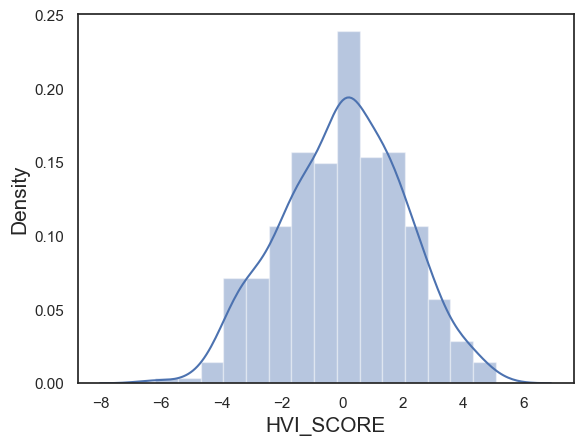

In [75]:
import seaborn as sns

# set the label size of the histogram
plt.rcParams["axes.labelsize"] = 15

# get the column of perc_5plus
HVI = heat_gdf_valid['HVI_SCORE']

# plot the histogram distribution 
with sns.axes_style("white"):
    sns.distplot(HVI)
    


C:\Users\tui87698\AppData\Local\Temp\ipykernel_18584\296049688.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HEI)


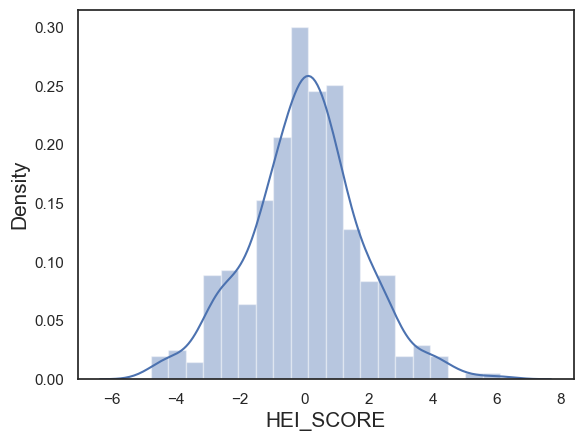

In [59]:
HEI = heat_gdf_valid['HEI_SCORE']

with sns.axes_style("white"):
    sns.distplot(HEI)

In [60]:
plot_df = heat_gdf_valid[['HVI_SCORE', 'HEI_SCORE']]

Text(0.5, 1.0, 'Box maps')

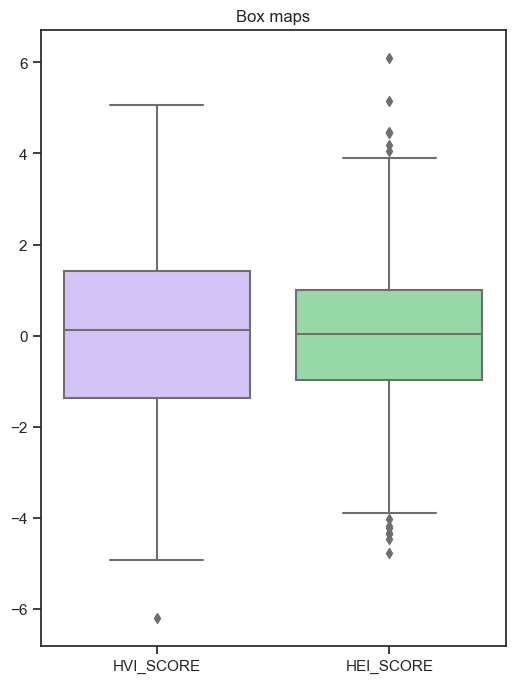

In [61]:
# set the size of the plot
plt.figure(figsize=(6, 8))

sns.set_style("white")
sns.set(style="ticks", palette="pastel")

sns.boxplot(data=plot_df, palette=["m", "g"])
plt.title("Box maps")

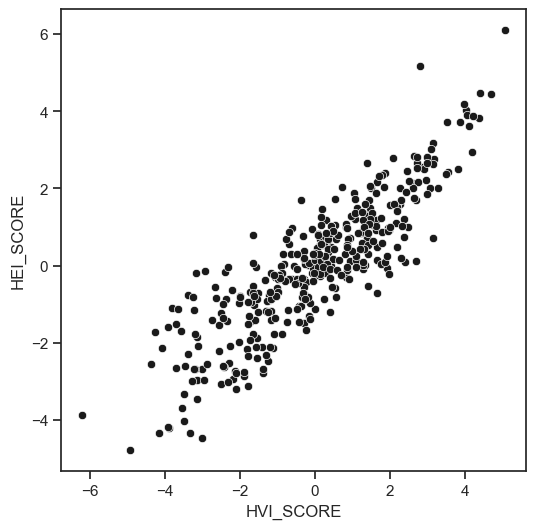

In [63]:
plt.figure(figsize=(6, 6))

ax = sns.scatterplot(x="HVI_SCORE", y="HEI_SCORE", data=plot_df, color='k')


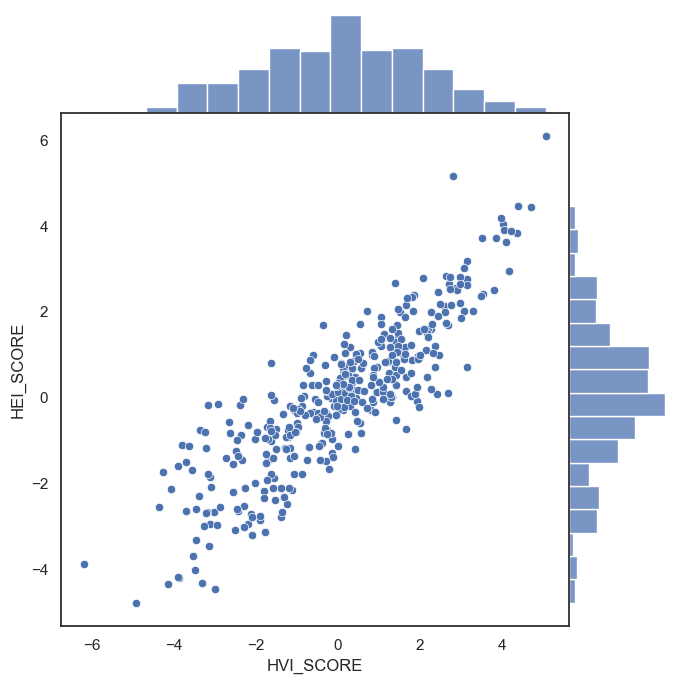

In [64]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x=HVI, y=HEI, data=plot_df, height=7, space=0) #kind="hex",


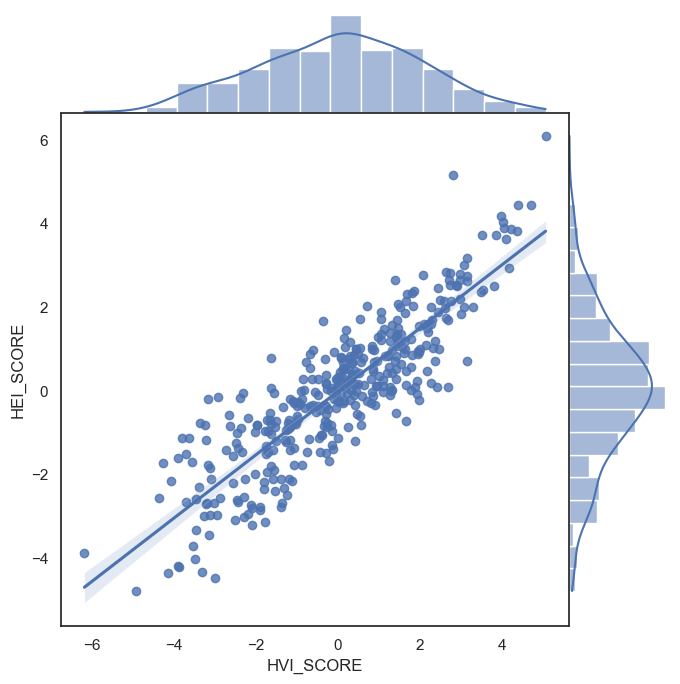

In [65]:
sns.set(style="white")

with sns.axes_style("white"):
    sns.jointplot(x=HVI, y=HEI, data=plot_df, kind="reg", height=7, space=0)
    

In [66]:
# pearson correlation
plot_df.corr(method = 'pearson')

,HVI_SCORE,HEI_SCORE
HVI_SCORE,1.000000,0.872758
HEI_SCORE,0.872758,1.000000


In [67]:
# spearman correlation or rank correlation
plot_df.corr(method = 'spearman')

,HVI_SCORE,HEI_SCORE
HVI_SCORE,1.000000,0.870889
HEI_SCORE,0.870889,1.000000


In [69]:
import libpysal as lps

# fill the nan with mean value of the column
heat_gdf['HVI_SCORE'].fillna((heat_gdf['HVI_SCORE'].mean()), inplace=True)

# create the queen spatial weight
df = heat_gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [70]:
wq.transform = 'r'
y = df['HVI_SCORE']

In [71]:
import esda
import numpy as np

np.random.seed(12345)

# calculate the moran's I coefficient
mi = esda.moran.Moran(y, wq)
mi.I

0.5795285555572788

C:\Users\tui87698\AppData\Local\Temp\ipykernel_18584\2386594959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(mi.sim, shade=True)


Text(0.5, 0, "Moran's I")

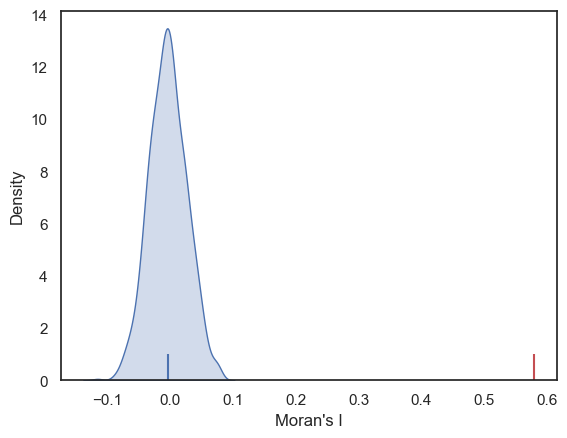

In [72]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [73]:
mi.p_sim

0.001